In [1]:
import pandas as pd

# Load the dataset
file_path = 'China_cities.csv'
cities_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
cities_df.head()


,省级行政区,城市,北纬,东经
0,北京,北京市,39.904690,116.40717
1,天津,天津市,39.085100,117.19937
2,上海,上海市,31.230370,121.47370
3,重庆,重庆市,29.564710,106.55073
4,香港特别行政区,九龙,22.327115,114.17495


In [2]:
# Data Preprocessing: Retain only latitude and longitude
coordinates_df = cities_df[['北纬', '东经']]
coordinates_df.head()


,北纬,东经
0,39.904690,116.40717
1,39.085100,117.19937
2,31.230370,121.47370
3,29.564710,106.55073
4,22.327115,114.17495


C:\Users\qurui\anaconda3\envs\mlexp\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


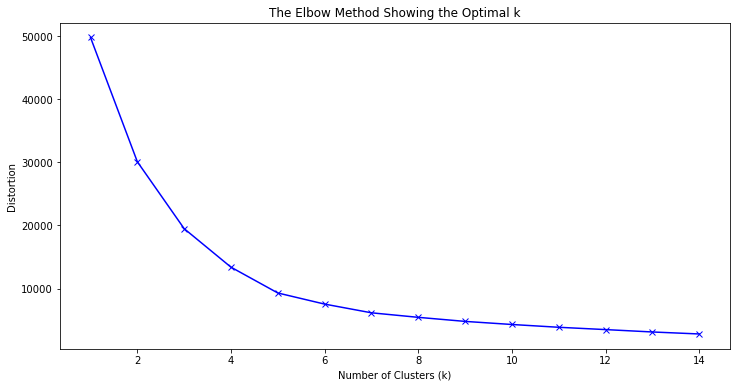

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
distortions = []
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(coordinates_df)
    distortions.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(12, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()


C:\Users\qurui\anaconda3\envs\mlexp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


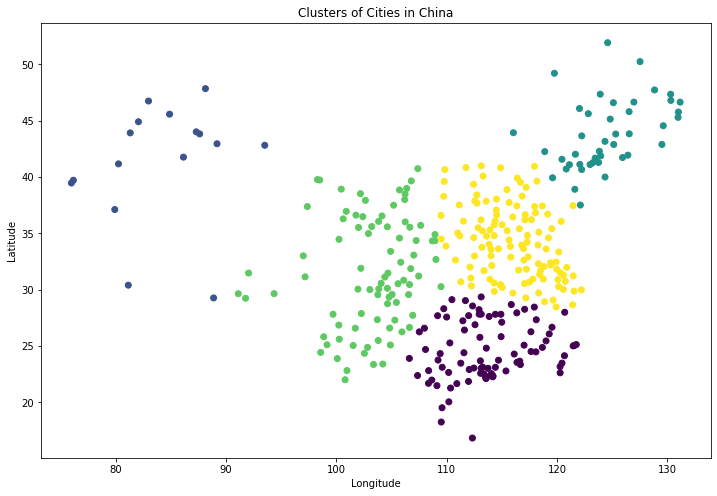

,北纬,东经,Cluster
0,39.904690,116.40717,4
1,39.085100,117.19937,4
2,31.230370,121.47370,4
3,29.564710,106.55073,3
4,22.327115,114.17495,0


In [4]:
# Applying KMeans with k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(coordinates_df)
clusters = kmeans.predict(coordinates_df)

# Adding cluster information to the DataFrame
coordinates_df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(12, 8))
plt.scatter(coordinates_df['东经'], coordinates_df['北纬'], c=coordinates_df['Cluster'], cmap='viridis')
plt.title('Clusters of Cities in China')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

coordinates_df.head()
